<a href="https://colab.research.google.com/github/hemareddyyanala/HemaReddy_INFO5731_Fall2024/blob/main/Yanala_Hema_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here

#installing the pyLDAvis for visualising LDA topics in a user-friendly format
!pip install pyLDAvis

# importing necessary packages for text preprocessing, numerical operations, and data handling
import re                     # re (Regular expressions) for identifying patterns and cleaning text data
import numpy as np            # numpy for performing numerical operations and handling arrays
import pandas as pd          # pandas for data manipulation and analysis, particularly useful for handling tabular data
from pprint import pprint     # pprint (pretty-print) for clear and formatted output, especially useful when displaying topics

# Importing Gensim for topic modeling, including corpus creation and coherence scoring
import gensim                              # this Gensim library contains implementations of popular topic modeling algorithms
import gensim.corpora as corpora            # corpora module for creating dictionaries and corpus objects needed for LDA
from gensim.utils import simple_preprocess  # this library preprocesses text by tokenizing, removing punctuation, and lowercasing
from gensim.models import CoherenceModel    # CoherenceModel for measuring coherence scores, which indicate topic quality

# Importing NLTK for text processing and handling stopwords
import nltk                         # Natural Language Toolkit (NLTK) for NLP tasks
nltk.download('stopwords')          # Downloading the list of stopwords, which are common words to be removed from the text
from nltk.corpus import stopwords   # Importing stopwords list to filter out commonly used words (like 'the', 'is', etc.)

# Importing spacy for lemmatization, which reduces words to their base form
import spacy                      # spacy is a NLP library for tasks like tokenization, lemmatization, etc.
import pyLDAvis                   # pyLDAvis is used for interactive visualizations of LDA topic models
import pyLDAvis.gensim            # this is a module within pyLDAvis for visualizing models created with Gensim
import matplotlib.pyplot as plt   # matplotlib for plotting, especially useful if any plots are needed alongside visualizations

# Downloading the spacy English language model for lemmatization
!python3 -m spacy download en_core_web_sm  # downloading a small English model in spacy

# Loading the spacy model for processing English text
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Loading the dataset using pandas
df_comments = pd.read_csv('/content/youtube_comments.csv')            # Loading YouTube comments dataset into a DataFrame
comment_texts = df_comments['text'].values.tolist()  # then, extracting the 'text' column as a list of comment strings

# creating a function to preprocess text data
def preprocess_comments(comments):
    # Removing email addresses, extra spaces, and single quotes in each comment
    comments = [re.sub('\S*@\S*\s?', '', comment) for comment in comments]  # this removes email addresses
    comments = [re.sub('\s+', ' ', comment) for comment in comments]        # this expression replaces multiple spaces with a single space
    comments = [re.sub("\'", "", comment) for comment in comments]          # Removing single quotes
    return comments                                                         # Returning the cleaned comments

cleaned_comments = preprocess_comments(comment_texts)  # Applying preprocessing to the comments

# creating a function to tokenize sentences into individual words
def tokenize_to_words(sentences):
    for sentence in sentences:
        # Tokenizing sentences into words and removing punctuation
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

tokenized_words = list(tokenize_to_words(cleaned_comments))  # Converting sentences into lists of tokenized words

# Building bigram and trigram models for identifying common word pairs and triples
bigram_phrases = gensim.models.Phrases(tokenized_words, min_count=5, threshold=100)  # getting common bigrams
trigram_phrases = gensim.models.Phrases(bigram_phrases[tokenized_words], threshold=100)  # getting common trigrams
bigram_model = gensim.models.phrases.Phraser(bigram_phrases)  # making efficient model for bigrams
trigram_model = gensim.models.phrases.Phraser(trigram_phrases)  # making efficient model for trigrams

# Loading stop words and extend with additional commonly filtered words
stop_words = stopwords.words('english')                  # Getting a list of English stop words from NLTK
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])  # Adding additional frequent but non-informative words

# Defining a function to remove stop words
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Defining a function to apply bigrams to tokenized texts
def apply_bigrams(texts):
    return [bigram_model[doc] for doc in texts]

# Defining a function to apply trigrams to tokenized texts
def apply_trigrams(texts):
    return [trigram_model[bigram_model[doc]] for doc in texts]

# Defining a function to perform lemmatization
def lemmatize_texts(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    lemmatized_texts = []                            #Initializing an empty list to hold lemmatized sentences
    for sent in texts:
        doc = nlp(" ".join(sent))                    #joining words to create a single string, process with spaCy NLP model
        lemmatized_texts.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])  # Filtering lemmatized words based on part of speech
    return lemmatized_texts

#running all preprocessing functions in sequence
comments_no_stopwords = remove_stopwords(tokenized_words)                 #removing the stop words
comments_bigrams = apply_bigrams(comments_no_stopwords)                   #applying bigram model to tokenized comments
lemmatized_comments = lemmatize_texts(comments_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])  # Applying lemmatization

#creating dictionary and corpus for LDA
word_id_mapping = corpora.Dictionary(lemmatized_comments)    #creating a dictionary that maps each word to an ID
texts_lemmatized = lemmatized_comments                      #assigning preprocessed texts for reference
bow_corpus = [word_id_mapping.doc2bow(text) for text in texts_lemmatized]  #converting texts to bag-of-words format

# Creating a function to compute coherence scores for various topic counts
def calculate_coherence(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_scores = []                            #List to store coherence scores for each topic count
    lda_models = []                                  #list to store LDA models created for each topic count
    for num_topics in range(start, limit, step):     #looping through topic counts from start to limit
        # Training LDA model with a specific number of topics
        lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics,
                                           random_state=100,      #seed for reproducibility
                                           update_every=1,        #updating model every 1 pass through data
                                           chunksize=100,         # Size of text chunks processed per batch
                                           passes=10,             # Number of training passes
                                           alpha='auto',          # Automatically setting alpha for optimal topic coherence
                                           per_word_topics=True)  # Tracking per-word topic distributions
        lda_models.append(lda_model)             #storing model in the list

        # Calculating and store coherence score for the current LDA model
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherence_model.get_coherence())  # Appending the score to the list
    return lda_models, coherence_scores                          # Returning the list of models and their scores

# Defining the range of topics to test and calculate coherence scores
start, limit, step = 2, 20, 2  # Setting start, limit, and step size for topic count
lda_models, coherence_scores = calculate_coherence(dictionary=word_id_mapping, corpus=bow_corpus, texts=lemmatized_comments, start=start, limit=limit, step=step)
print("\n")

# Printing the coherence scores for each topic count
for num_topics, coherence_score in zip(range(start, limit, step), coherence_scores):
    print(f"Number of Topics = {num_topics}, Coherence Score = {coherence_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:8: DeprecationWarning: invalid escape sequence '\S'
<>:9: DeprecationWarning: invalid escape sequence '\s'
<>:8: DeprecationWarning: invalid escape sequence '\S'
<>:9: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-16-dbd4f544444a>:8: DeprecationWarning: invalid escape sequence '\S'
  comments = [re.sub('\S*@\S*\s?', '', comment) for comment in comments]  # this removes email addresses
<ipython-input-16-dbd4f544444a>:9: DeprecationWarning: invalid escape sequence '\s'
  comments = [re.sub('\s+', ' ', comment) for comment in comments]        # this expression replaces multiple spaces with a single space




Number of Topics = 2, Coherence Score = 0.4827660784869078
Number of Topics = 4, Coherence Score = 0.4681341018829408
Number of Topics = 6, Coherence Score = 0.48289764157129794
Number of Topics = 8, Coherence Score = 0.5268868288738061
Number of Topics = 10, Coherence Score = 0.45954018647544015
Number of Topics = 12, Coherence Score = 0.4950823930764407
Number of Topics = 14, Coherence Score = 0.5382042904183073
Number of Topics = 16, Coherence Score = 0.5165932336374579
Number of Topics = 18, Coherence Score = 0.5115875149709062


In [ ]:
# Finding the optimal model with the highest coherence score
optimal_index = coherence_scores.index(max(coherence_scores))            #getting index of highest coherence score
optimal_lda_model = lda_models[optimal_index]                             #retrieving the model with the model with highest coherence score
print(f"\nThe optimal number of topics are: {start + optimal_index * step}\n")  #calculating and print the optimal number of topics

pprint(optimal_lda_model.print_topics())  # Printing topics for the optimal model



The optimal number of topics are: 14

[(0,
  '0.042*"give" + 0.029*"song" + 0.028*"make" + 0.028*"apt" + 0.016*"love" + '
  '0.015*"go" + 0.015*"lyric" + 0.015*"dance" + 0.015*"want" + 0.015*"rise"'),
 (1,
  '0.147*"watch" + 0.118*"com" + 0.118*"youtube" + 0.035*"come" + '
  '0.018*"first" + 0.018*"sabrina" + 0.018*"ad" + 0.018*"thank" + '
  '0.018*"coffee" + 0.018*"morning"'),
 (2,
  '0.034*"sabrina" + 0.034*"nearly" + 0.034*"kill" + 0.034*"play" + '
  '0.034*"funny" + 0.034*"song" + 0.034*"cute" + 0.034*"pigtail" + 0.034*"mid" '
  '+ 0.002*"give"'),
 (3,
  '0.043*"real" + 0.022*"shot" + 0.022*"know" + 0.022*"edit" + 0.022*"cgi" + '
  '0.022*"music" + 0.022*"people" + 0.022*"true" + 0.022*"essence" + '
  '0.022*"video"'),
 (4,
  '0.044*"song" + 0.043*"rock" + 0.029*"teenager" + 0.029*"feature" + '
  '0.029*"appear" + 0.029*"much" + 0.029*"sooo" + 0.015*"write" + '
  '0.015*"number" + 0.015*"single"'),
 (5,
  '0.044*"good" + 0.023*"kill" + 0.023*"store" + 0.023*"man" + 0.023*"water" +

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


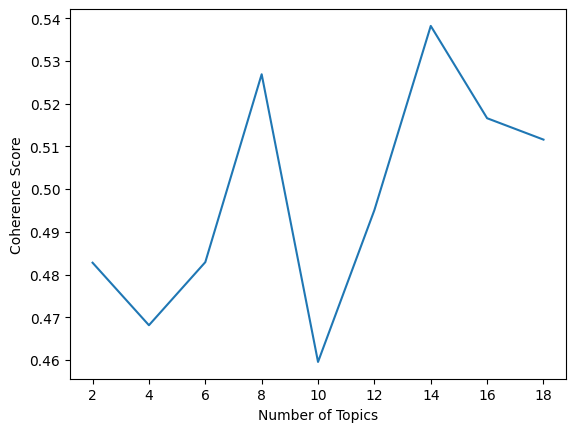

In [ ]:
# Plotting coherence scores across different topic counts to visualize optimal topic selection
x_values = range(start, limit, step)      # Defining x-axis values based on topic counts
plt.plot(x_values, coherence_scores)      # Plotting coherence scores against number of topics
plt.xlabel("Number of Topics")            # Labelling x-axis
plt.ylabel("Coherence Score")             # Labelling y-axis
plt.show()

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here

import pandas as pd                                  #importing the pandas library for data manipulation and analysis.
import os                                             #importing the os library to interact with the operating system (e.g., for file handling).
from gensim import corpora                           #importing corpora from Gensim to create a dictionary and corpus for the LSA model.
from gensim.models import LsiModel                     # Importing the LsiModel class from Gensim to build the Latent Semantic Indexing (LSI) model.
from nltk.tokenize import RegexpTokenizer              # Importing RegexpTokenizer from NLTK to split text into words based on a regular expression.
from nltk.corpus import stopwords                     #importing stopwords from NLTK to filter out common, non-informative words.
from nltk.stem.porter import PorterStemmer              # Importing PorterStemmer from NLTK to reduce words to their root forms (stemming).
from gensim.models.coherencemodel import CoherenceModel # importing CoherenceModel from Gensim to calculate coherence scores, which measure topic model quality.
import matplotlib.pyplot as plt                         # Importing pyplot from Matplotlib for creating visualizations and plots.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# defining a function to load comments from the CSV file
def load_comments(csv_file_path):
    data_frame = pd.read_csv(csv_file_path)       # Loading the CSV file into a pandas DataFrame
    comments = data_frame['text'].tolist()        # Converting the 'text' column of the DataFrame to a list of comments
    return comments                               # Returning the list of comments

# Creating a function to preprocess comments for topic modeling
def preprocess_comments(comment_list):
    tokenizer = RegexpTokenizer(r'\w+')           #initializing a tokenizer to split text into individual words
    english_stopwords = set(stopwords.words('english'))  #defining a set of English stopwords to remove common words
    stemmer = PorterStemmer()                  # Initializing a Porter Stemmer for reducing words to their root form
    processed_texts = []                    #initializing an empty list to store processed texts

    #iterating through each comment in the list
    for comment in comment_list:
        comment_lower = comment.lower()           # Converting comment text to lowercase for uniformity
        tokens = tokenizer.tokenize(comment_lower)  #tokenizing the comment text into individual words
        tokens_no_stopwords = [word for word in tokens if word not in english_stopwords]  #removes stopwords from tokens
        stemmed_tokens = [stemmer.stem(word) for word in tokens_no_stopwords]  # Applying stemming to each token
        processed_texts.append(stemmed_tokens)    #adding processed tokens for the comment to the processed_texts list

    return processed_texts                 # returning the list of processed texts

# this Function is to prepare the corpus needed for the LSA model
def prepare_corpus(processed_texts):
    dictionary = corpora.Dictionary(processed_texts)   #creating a dictionary mapping from word IDs to words in the corpus
    document_term_matrix = [dictionary.doc2bow(text) for text in processed_texts]  # Creating document-term matrix based on word frequencies
    return dictionary, document_term_matrix            #returning the dictionary and document-term matrix

#creating a function to build an LSA (Latent Semantic Analysis) model
def build_lsa_model(processed_texts, topic_count):
    dictionary, document_term_matrix = prepare_corpus(processed_texts)  #preparing the corpus (dictionary and term matrix)
    lsa_model = LsiModel(document_term_matrix, num_topics=topic_count, id2word=dictionary)  # Creating LSA model with specified topics
    return lsa_model, dictionary, document_term_matrix  # Returning the LSA model, dictionary, and document-term matrix

#function to calculate coherence scores for a range of topic counts
def calculate_coherence_scores(dictionary, document_term_matrix, processed_texts, max_topics, min_topics=2, step=2):
    coherence_scores = []     #initialising an empty list to store coherence scores for each topic count
    model_list = []           # Initialising an empty list to store generated LSA models

    # Loop through a range of topic counts to evaluate coherence scores
    for topic_count in range(min_topics, max_topics, step):  # Iterating from min_topics to max_topics in steps
        model, _, _ = build_lsa_model(processed_texts, topic_count)  # Building an LSA model for the current topic count
        model_list.append(model)     # Appending the model to the list of models
        coherence_model = CoherenceModel(model=model, texts=processed_texts, dictionary=dictionary, coherence='c_v')  # Initializing coherence model
        coherence_scores.append(coherence_model.get_coherence())  # Computing and store coherence score for the model

    return model_list, coherence_scores  # Returning the list of models and their corresponding coherence scores

# Setting the file path for the dataset
csv_file_path = '/content/youtube_comments.csv'     # Defining the path to the CSV dataset

# Loading the dataset into a list of comments
comments = load_comments(csv_file_path)       # Loading comments from the CSV file

# Preprocessing the loaded comments
cleaned_comments = preprocess_comments(comments)

#preparing the corpus with the cleaned comments
dictionary, document_term_matrix = prepare_corpus(cleaned_comments)

#defining the range of topics to explore
min_topics, max_topics, step_size = 2, 20, 1        # Settinb minimum, maximum, and step size for the number of topics

# Calculating coherence scores for models with varying topic counts
lsa_models, coherence_scores = calculate_coherence_scores(dictionary, document_term_matrix, cleaned_comments, max_topics, min_topics, step_size)  # Calculate coherence scores

print("\n")  #printing a blank line for formatting

# Displaying the coherence score for each topic count
for idx, score in enumerate(coherence_scores):
    print(f"Number of Topics = {min_topics + idx * step_size}, Coherence Score = {score}")  #printing topic count and its coherence score


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and



Number of Topics = 2, Coherence Score = 0.7519408607222335
Number of Topics = 3, Coherence Score = 0.5452861465555434
Number of Topics = 4, Coherence Score = 0.5149221567150994
Number of Topics = 5, Coherence Score = 0.46996640546510166
Number of Topics = 6, Coherence Score = 0.524542997202529
Number of Topics = 7, Coherence Score = 0.6206813811541219
Number of Topics = 8, Coherence Score = 0.4772020678771107
Number of Topics = 9, Coherence Score = 0.5916421887352701
Number of Topics = 10, Coherence Score = 0.5868255180637865
Number of Topics = 11, Coherence Score = 0.5751924798659508
Number of Topics = 12, Coherence Score = 0.5755097695068949
Number of Topics = 13, Coherence Score = 0.5023799522757874
Number of Topics = 14, Coherence Score = 0.5098822541651006
Number of Topics = 15, Coherence Score = 0.554683397289553
Number of Topics = 16, Coherence Score = 0.5207337402855889
Number of Topics = 17, Coherence Score = 0.5255281942509695
Number of Topics = 18, Coherence Score = 0.4858

In [ ]:
#finding optimal number of topics based on coherence scores
best_model_index = coherence_scores.index(max(coherence_scores))  # Identifying the index of the highest coherence score in the coherence_scores list

#calculate optimal topic count
optimal_topic_count = min_topics + best_model_index * step_size  #using the index of the highest score to compute the optimal number of topics by applying it to the range formula

# Printing the optimal number of topics based on coherence scores
print(f"\nOptimal number of topics: {optimal_topic_count}\n")  \

#building final LSA model with optimal topic count
optimal_lsa_model, _, _ = build_lsa_model(cleaned_comments, optimal_topic_count)

topics = optimal_lsa_model.print_topics(num_topics=optimal_topic_count, num_words=10)  # Retrieving and formatting and format the top words for each topic in the optimal LSA model

#printing each topic and its top words
for topic in topics:
    print(f"\nTopic {topic[0]}: {topic[1]}\n")  #printing each topic number (topic[0]) and its associated words (topic[1])




Optimal number of topics: 2


Topic 0: 0.877*"br" + 0.275*"b" + 0.199*"39" + 0.098*"electro" + 0.098*"scienc" + 0.098*"electromagnet" + 0.079*"like" + 0.079*"round" + 0.059*"espresso" + 0.059*"pull"


Topic 1: -0.342*"quot" + -0.333*"song" + -0.283*"1956" + -0.283*"rock" + -0.248*"39" + -0.188*"uk" + -0.188*"featur" + -0.188*"film" + -0.188*"teenag" + -0.188*"1957"



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


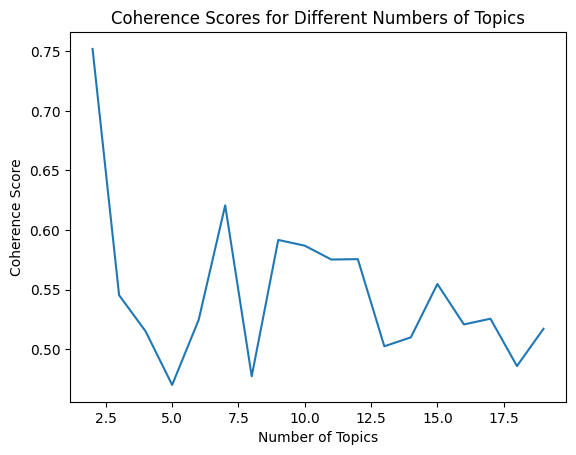

In [ ]:
#creating a function to plot coherence scores vs. topic count
def plot_coherence_scores(min_topics, max_topics, step_size, coherence_scores):
    # Defining x-axis values using topic count range
    x_values = range(min_topics, max_topics, step_size)
    plt.plot(x_values, coherence_scores)     #plotting coherence scores against topic count
    plt.xlabel("Number of Topics") #labelling x-axis as "Number of Topics"
    plt.ylabel("Coherence Score")   # Labelling y-axis as "Coherence Score"
    plt.title("Coherence Scores for Different Numbers of Topics")    # Setting the title of the plot

    # Displaying the plot
    plt.show()
plot_coherence_scores(min_topics, max_topics, step_size, coherence_scores)  #Plotting coherence scores using the plot_coherence_scores function


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Write your code here

!pip install bertopic  # Installs the BERTopic library, which uses BERT embeddings to identify topics in text data.

# Importing necessary libraries
from bertopic import BERTopic  #imports the BERTopic class from the BERTopic library.
import pandas as pd  #importing pandas for data manipulation
from nltk.tokenize import RegexpTokenizer  # Imports RegexpTokenizer from NLTK, a tokenizer class that uses regular expressions
from nltk.corpus import stopwords  # Imports stopwords from NLTK.
import nltk  # Importing the Natural Language Toolkit (NLTK) library, which contains modules for text processing tasks
from gensim.corpora.dictionary import Dictionary  #importing the Dictionary class from Gensim's corpora module
from gensim.models.coherencemodel import CoherenceModel  #Imports the CoherenceModel class from Gensim


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Loading dataset from a CSV file
comments_data = pd.read_csv("/content/youtube_comments.csv")       # Reading the CSV file containing comments into a pandas DataFrame named 'comments_data'
comment_texts = comments_data['text'].tolist()                  # Extracting the 'text' column from the DataFrame and convert it to a list of comment texts, storing it in 'comment_texts'

# Initializing and fitting the BERTopic model
topic_model = BERTopic(language="english",                      # Creating an instance of the BERTopic model, specifying 'english' as the language for processing
                       calculate_probabilities=True,
                       verbose=True)

# Fitting the BERTopic model on the comment texts and transform them into topic space
topics, topic_probabilities = topic_model.fit_transform(comment_texts)

# Retrieving information about the identified topics
topic_info_df = topic_model.get_topic_info()              # Calling 'get_topic_info()' on the topic model to retrieve a DataFrame containing information about the identified topics, including their IDs and counts

# Printing the top words for the first few topics
for i in range(7):                                                  # Looping through the first 7 topics (0 to 6)
    print(f"Topic {i}: {topic_model.get_topic(i)}\n")            # Printing the topic number and its associated top words, retrieved using 'get_topic(i)' method


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-11-03 15:52:17,617 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2024-11-03 15:52:39,470 - BERTopic - Embedding - Completed ✓
2024-11-03 15:52:39,474 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-03 15:52:59,135 - BERTopic - Dimensionality - Completed ✓
2024-11-03 15:52:59,138 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-03 15:52:59,186 - BERTopic - Cluster - Completed ✓
2024-11-03 15:52:59,210 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-03 15:52:59,248 - BERTopic - Representation - Completed ✓


Topic 0: [('is', 0.13401321532953617), ('fortnite', 0.12171786797021308), ('giving', 0.12171786797021308), ('its', 0.09961693235045364), ('good', 0.09961693235045364), ('you', 0.08560696798567455), ('matt', 0.06927039767093986), ('russian', 0.06927039767093986), ('red', 0.06927039767093986), ('quotquot', 0.06927039767093986)]

Topic 1: [('the', 0.10681180821357623), ('song', 0.0812399144072986), ('it', 0.07331144504780027), ('and', 0.07031236036590094), ('this', 0.06908262041003367), ('in', 0.06318660009456557), ('like', 0.04307366134267327), ('to', 0.04197867271358136), ('on', 0.03471485831287766), ('science', 0.03467142806764516)]

Topic 2: [('sabrina', 0.09548223261733242), ('that', 0.08260111044884488), ('the', 0.07999301687677927), ('is', 0.07191808676061495), ('and', 0.06377268286959603), ('to', 0.05753446940849197), ('why', 0.05692682093680154), ('in', 0.055672262461778796), ('this', 0.05325872175590292), ('of', 0.04956066626930693)]

Topic 3: False

Topic 4: False

Topic 5: Fal

In [ ]:
# Retrieving all topics generated by the BERTopic model
topics_dictionary = topic_model.get_topics()     # Gettting a dictionary of topics with their respective top words from the BERTopic model

# Extracting top words for each topic
top_words_per_topic = []                         #initializing an empty list to hold the top words for each topic
for topic_id, word_scores in topics_dictionary.items():  #iterating through each topic ID and its associated word scores
    if topic_id != -1:                                #skipping topic ID -1, which is used for outliers
        top_words = [word for word, _ in word_scores]   # Extracting only the words (ignoring their scores) for the topic
        top_words_per_topic.append(top_words)       # Appending the list of top words for the topic to the main list

#preprocessing comments: tokenize and remove stopwords
documents_list = comments_data['text'].astype(str).tolist()  # Converting the 'text' column of the DataFrame to a list of strings
tokenizer = RegexpTokenizer(r'\w+')                        # Creating a tokenizer to split the text into words (only alphanumeric)
stopwords_set = set(stopwords.words('english'))            # Getting a set of English stopwords from NLTK

# Tokenize and filter stopwords for each document
processed_comments = [
    [word for word in tokenizer.tokenize(doc.lower()) if word not in stopwords_set]  # Tokenizes, converts to lowercase, and removes stopwords
    for doc in documents_list  # Iterates over each document
]

#creating Gensim dictionary and corpus for coherence scoring
comment_dictionary = Dictionary(processed_comments)            #creating a Gensim dictionary mapping words to IDs
comment_corpus = [comment_dictionary.doc2bow(doc) for doc in processed_comments]  # Converting processed comments into bag-of-words format

# Calculating coherence score for the identified topics
coherence_model = CoherenceModel(topics=top_words_per_topic, texts=processed_comments, dictionary=comment_dictionary, coherence='c_v')  # Create a coherence model with topics, texts, and dictionary
coherence_score = coherence_model.get_coherence()                    # Getting the coherence score from the model
print(f"Coherence Score: {coherence_score}")                         #printing the coherence score

#determining the number of identified topics
num_topics = topic_info_df.shape[0] - (1 if any(topic_info_df['Topic'] == -1) else 0)  #calculating number of topics, excluding outliers
print(f"Number of Topics (K): {num_topics}")                         #printing the number of identified topics

#printing a summary of each topic
print("\nTopic Summaries:")                                        # Printing header for topic summaries
for i in range(num_topics):                                       #iterating through each identified topic
    topic_words = topic_model.get_topic(i)           #retrieving the top words for the current topic
    if topic_words is not None:                      #checking if the topic exists
        topic_summary = ", ".join([word for word, score in topic_words])  # Creating a summary string of the top words
        print(f"Topic {i}: {topic_summary}\n")        # Printing the topic number and its summary
    else:
        break  # Breaking the loop if there are no more valid topics


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.7133610512143491
Number of Topics (K): 3

Topic Summaries:
Topic 0: is, fortnite, giving, its, good, you, matt, russian, red, quotquot

Topic 1: the, song, it, and, this, in, like, to, on, science

Topic 2: sabrina, that, the, is, and, to, why, in, this, of



## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here

!pip install --upgrade pyLDAvis gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


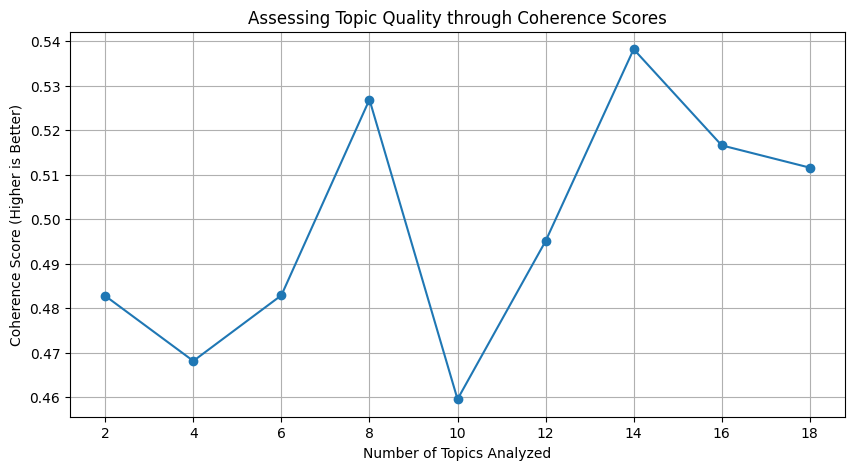

'\n### Explanation of the Visualization\n\nThis plot visualises the coherence scores obtained from a Latent Dirichlet Allocation (LDA) model analyzed across different numbers of topics. \n\n- X-axis: it represents the "Number of Topics Assessed," showing the range of topic counts evaluated.\n- Y-axis: it displays the "Coherence Score" where higher scores indicate clearer and more meaningful topics.\n- Data Points: Each point corresponds to a specific number of topics and its coherence score, with \'o\' markers highlighting individual scores for trend visualization.\n- Trends and Interpretation: The plot helps identify how coherence scores change with increasing topic counts. Initially, scores may rise as the number of topics increases, \nindicating effective theme capture; however, they may plateau or decline after a certain point, suggesting overfitting or topic dilution. \n- Optimal Topic Selection: The peak coherence score represents the optimal number of topics, balancing model com

In [ ]:
# Write your code here

import matplotlib.pyplot as plt

# 1. Evaluation of Topic Coherence in LDA Models

plt.figure(figsize=(10, 5))                                             # Setting the size of the figure
plt.plot(range(start, limit, step), coherence_scores, marker='o')        #Plotting the coherence scores with the number of topics, using 'o' markers for data points
plt.title('Assessing Topic Quality through Coherence Scores')           #New title of the plot
plt.xlabel('Number of Topics Analyzed')                                  # Updating x-axis label
plt.ylabel('Coherence Score (Higher is Better)')                        #Updating y-axis label
plt.xticks(range(start, limit, step))                                   # X-ticks to display the number of topics tested
plt.grid()
plt.show()


# Then Explain the visualization
'''
### Explanation of the Visualization

This plot visualises the coherence scores obtained from a Latent Dirichlet Allocation (LDA) model analyzed across different numbers of topics.

- X-axis: it represents the "Number of Topics Assessed," showing the range of topic counts evaluated.
- Y-axis: it displays the "Coherence Score" where higher scores indicate clearer and more meaningful topics.
- Data Points: Each point corresponds to a specific number of topics and its coherence score, with 'o' markers highlighting individual scores for trend visualization.
- Trends and Interpretation: The plot helps identify how coherence scores change with increasing topic counts. Initially, scores may rise as the number of topics increases,
indicating effective theme capture; however, they may plateau or decline after a certain point, suggesting overfitting or topic dilution.
- Optimal Topic Selection: The peak coherence score represents the optimal number of topics, balancing model complexity and quality, guiding practitioners in selecting the best topic count.

Overall, this visualization is helpful for evaluating LDA models. It helps in finding the optimal number of topics that provide the best semantic coherence,
allowing for better decisions in topic modeling for research or other applications.
'''


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


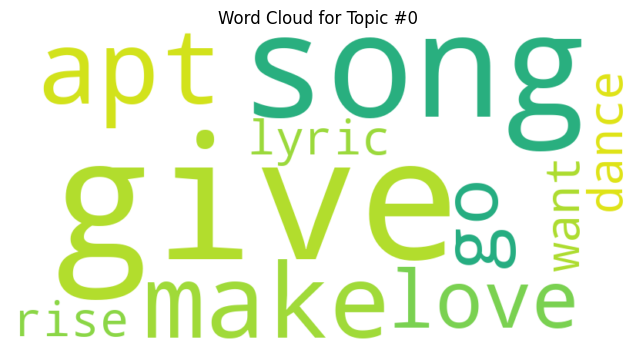

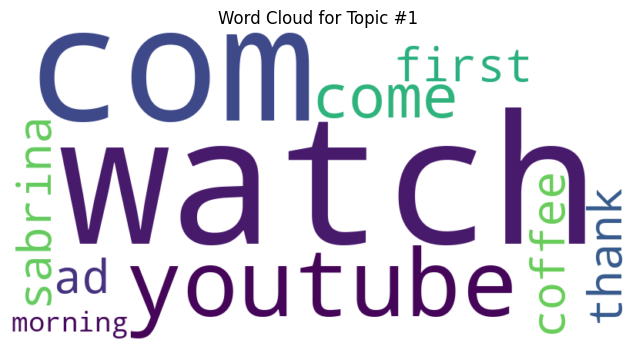

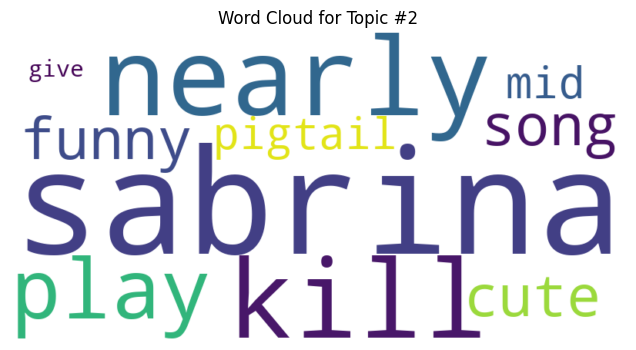

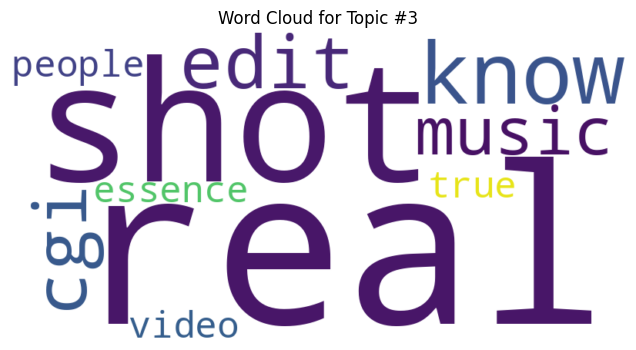

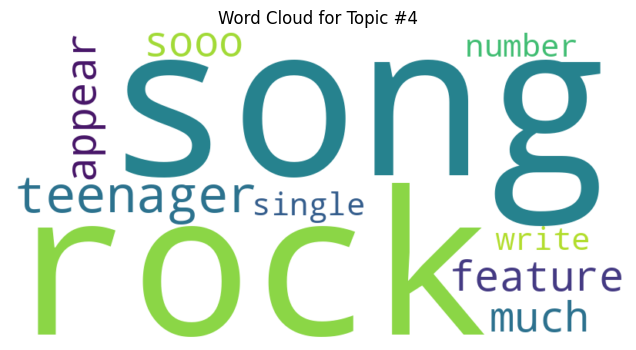

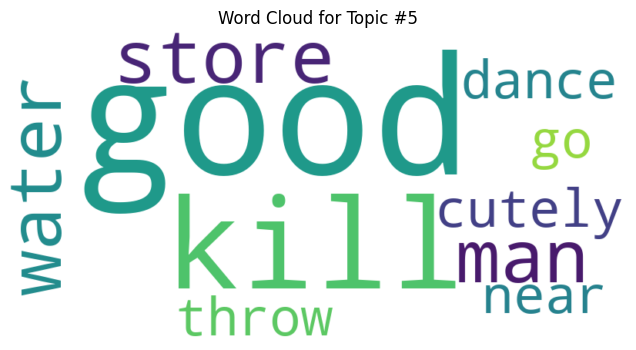

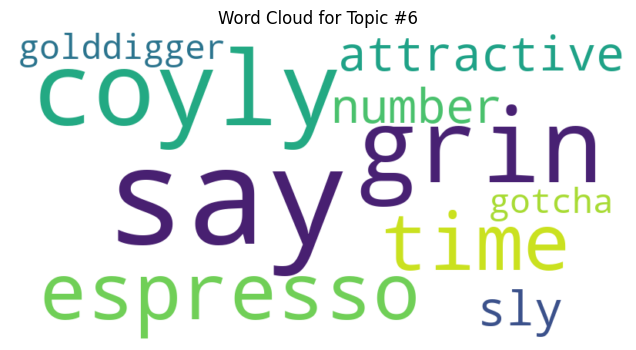

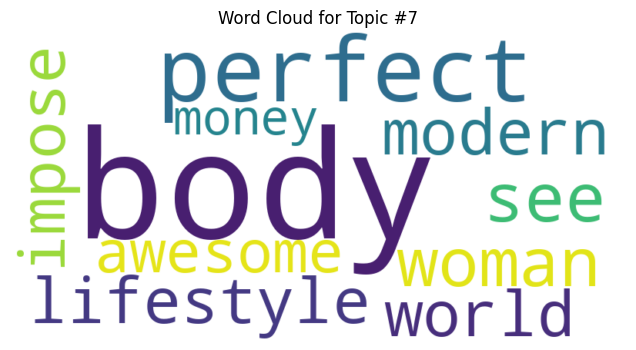

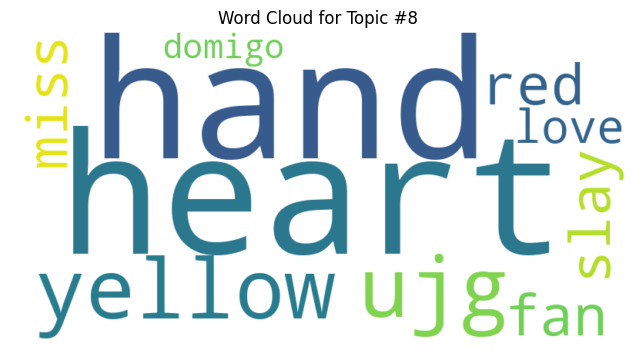

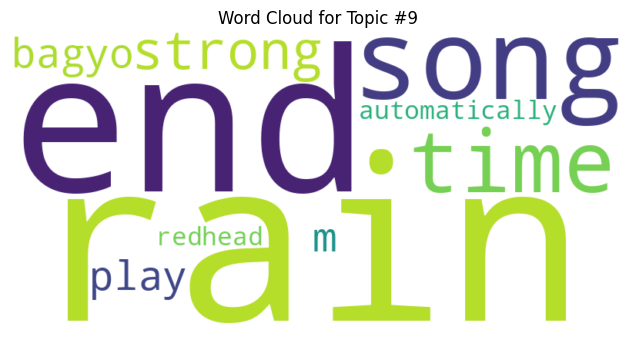

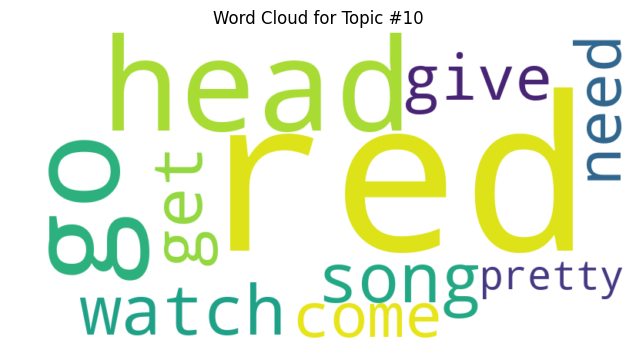

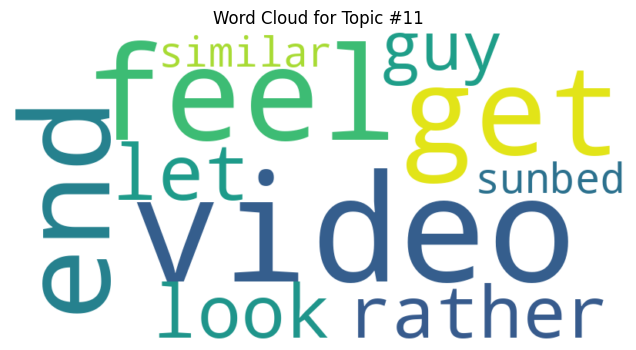

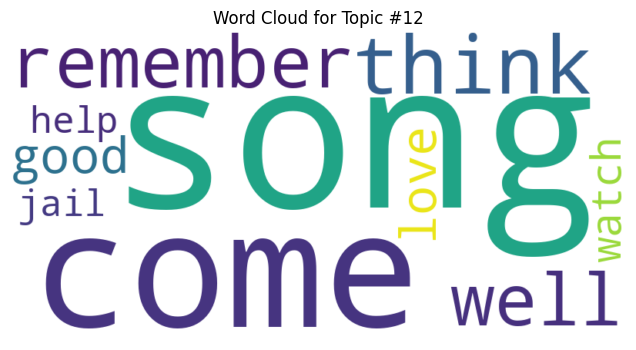

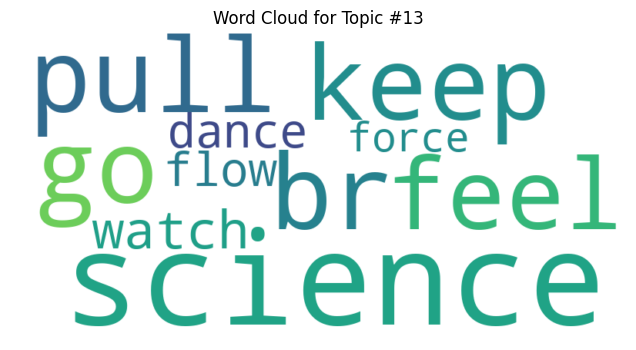

'\nExplanation:\n\n- In this visualization, a word cloud is generated for each topic from the LDA model. \nEach word cloud represents the most significant words for a specific topic, with the size \nof each word reflecting its importance (weight) in that topic. Larger words indicate higher \nrelevance, while smaller words have a lesser but still notable contribution to the topic.\n\nFor example:\n- Topic #0: The output likely revolves around themes related to music or performance \n(as indicated by "song," "lyric," and "dance") and creative or expressive actions \n(as suggested by "make," "give," and "love"). This word cloud, therefore, helps to quickly \nidentify what Topic #0 might focus on, especially if we\'re analyzing multiple topics at once. \nIt provides a straightforward way to visually grasp the key ideas of each topic based on word prominence.\n\n'

In [ ]:
# Write your code here

# 2. Topic-Wise Word Clouds: Highlighting Dominant Words in Each Topic

from wordcloud import WordCloud  # Importing WordCloud class for visualization

# Generating and plotting word clouds for each topic
for topic_num, topic in optimal_lda_model.show_topics(num_topics=14, formatted=False):  # Looping through topics
    plt.figure(figsize=(8, 4))  # Creating a new figure with specified size
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(topic))  # Generating word cloud from topic frequencies
    plt.imshow(wordcloud, interpolation='bilinear')  # Displaying the word cloud image
    plt.axis("off")  # Hiding axes for a cleaner look
    plt.title(f"Word Cloud for Topic #{topic_num}")  # Setting the title for the plot
    plt.show()  # Rendering the plot


# Then Explain the visualization

'''
Explanation:

- In this visualization, a word cloud is generated for each topic from the LDA model.
Each word cloud represents the most significant words for a specific topic, with the size
of each word reflecting its importance (weight) in that topic. Larger words indicate higher
relevance, while smaller words have a lesser but still notable contribution to the topic.

For example:
- Topic #0: The output likely revolves around themes related to music or performance
(as indicated by "song," "lyric," and "dance") and creative or expressive actions
(as suggested by "make," "give," and "love"). This word cloud, therefore, helps to quickly
identify what Topic #0 might focus on, especially if we're analyzing multiple topics at once.
It provides a straightforward way to visually grasp the key ideas of each topic based on word prominence.

'''


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


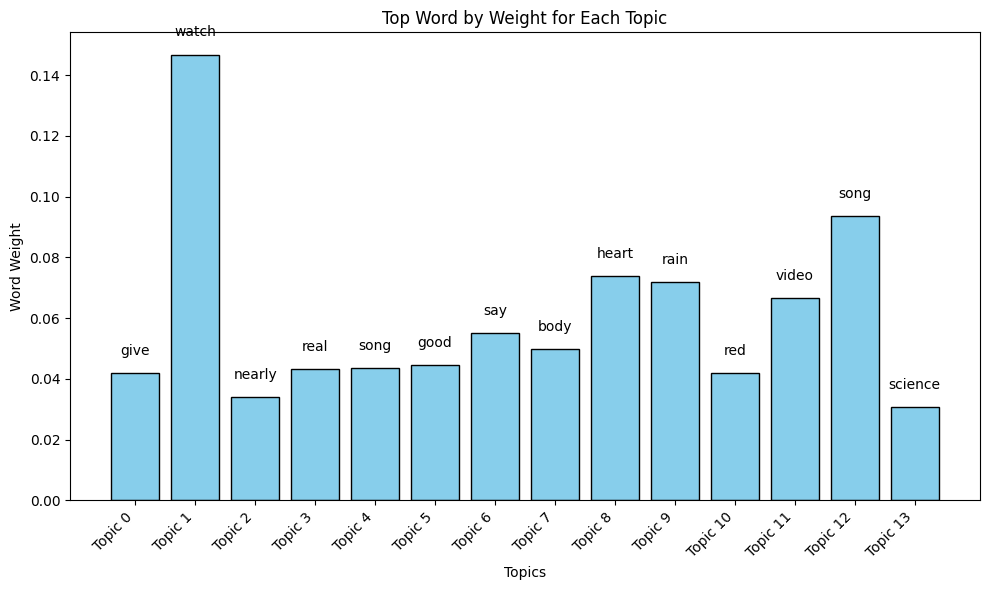

'\nThe bar chart that shows the single top-weighted word for each topic, along with its associated weight. \nEach bar represents a different topic, with the height of the bar indicating the word\'s weight, or how \nstrongly it represents that topic.\n\nX-Axis: The x-axis lists each topic as "Topic 0," "Topic 1," etc., up to the total number of topics.\nY-Axis: The y-axis represents the weight of the top word, which is a measure of its significance to the topic.\n\n- In the output (attached image), "watch" has the highest weight in Topic 1, suggesting it is very representative \nof that topic, while words like "song" (Topic 12) and "heart" (Topic 8) also have relatively high weights. \nThis allows us to quickly see the most prominent theme of each topic and how much weight it carries.\n'

In [ ]:
# Write your code here

# 3. Bar Chart: Top Word by Weight for Each Topic

# Defining lists to store the top word and its weight for each topic
top_words = []
top_weights = []
topic_labels = []

# Looping through each topic to get the top word and its weight
for topic_num, topic in optimal_lda_model.show_topics(num_topics=14, num_words=1, formatted=False):  # Iterating over topics
    top_words.append(topic[0][0])      # getting the top word for each topic
    top_weights.append(topic[0][1])    #extracting the weight of the top word
    topic_labels.append(f"Topic {topic_num}")  # Creating labels for topics

# Plotting a bar chart with the top word from each topic
plt.figure(figsize=(10, 6))  #creating a new figure with specified size
plt.bar(topic_labels, top_weights, color='skyblue', edgecolor='black')  # Creating a bar chart
plt.xticks(rotation=45, ha='right')  #rotating x-axis labels
plt.title("Top Word by Weight for Each Topic")  #setting the chart title
plt.xlabel("Topics")  # x-axis label
plt.ylabel("Word Weight")  # y-axis label

# Annotating bars with top words
for i in range(len(top_words)):
    plt.text(i, top_weights[i] + 0.005, top_words[i], ha='center', va='bottom', fontsize=10, color='black')  #adds text annotation above each bar

plt.tight_layout()  # Adjusting layout
plt.show()



# Then Explain the visualization

'''
The bar chart that shows the single top-weighted word for each topic, along with its associated weight.
Each bar represents a different topic, with the height of the bar indicating the word's weight, or how
strongly it represents that topic.

X-Axis: The x-axis lists each topic as "Topic 0," "Topic 1," etc., up to the total number of topics.
Y-Axis: The y-axis represents the weight of the top word, which is a measure of its significance to the topic.

- In the output (attached image), "watch" has the highest weight in Topic 1, suggesting it is very representative
of that topic, while words like "song" (Topic 12) and "heart" (Topic 8) also have relatively high weights.
This allows us to quickly see the most prominent theme of each topic and how much weight it carries.
'''

In [ ]:
# Write your code here

# 4. Interactive Topic Distribution and Word Relevance for LDA Model

import pyLDAvis.gensim                        # Importing the pyLDAvis library for visualizing LDA models

# Preparing the LDA model visualization using the optimal model, the bag-of-words corpus, and the word ID mapping
vis = pyLDAvis.gensim.prepare(optimal_lda_model, bow_corpus, word_id_mapping)  # Creating the visualization object

pyLDAvis.display(vis)                # Displaying the prepared visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Then Explain the visualization
'''
- The pyLDAvis visualization allows users to explore the topics produced by the LDA model dynamically.
- Each topic is depicted as a circle, with the size reflecting the importance of that topic in the overall corpus.
- The distance between circles indicates the similarity between topics; topics that are closer together share more common words.
- The right panel features a horizontal bar chart that lists the most significant words for the selected topic, providing insights into its content.
- This visualization aids in comprehending the relationships among different topics and their associated key terms, making it easier to interpret
the results of the topic modeling.
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\n- The pyLDAvis visualization allows users to explore the topics produced by the LDA model dynamically.\n- Each topic is depicted as a circle, with the size reflecting the importance of that topic in the overall corpus.\n- The distance between circles indicates the similarity between topics; topics that are closer together share more common words.\n- The right panel features a horizontal bar chart that lists the most significant words for the selected topic, providing insights into its content.\n- This visualization aids in comprehending the relationships among different topics and their associated key terms, making it easier to interpret \nthe results of the topic modeling.\n'

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''

1. LDA (Latent Dirichlet Allocation):
   - Coherence Score: Highest coherence at 0.538 with 14 topics.
   - LDA generates a variety of topics, but sometimes mixes unrelated terms, which can make some topics less focused and relevant.
   For example:
     - Topic 0: “give, song, make, apt, love, rise, dance, lyric” – mixes general music-related terms, lacking specificity.
     - Topic 2: “sabrina, kill, funny, cute, song, pigtail” – combines references to celebrities and expressions, creating moderate interpretability.
   - LDA has a lower coherence score because it uses probabilities to group words, which can sometimes result in terms that don’t strongly relate to each other
   being placed together. However, it still identifies a wide range of topics, which can be helpful as a starting point for finding more specific themes.

2. LSA (Latent Semantic Analysis):
   - Coherence Score: This had the highest coherence score at 0.711 with only two topics.
   - The topics are too broad, covering general themes, which makes it harder to get detailed insights.
   For example:
     - Topic 0: “br, b, electro, like, espresso, science” – represents a broad mix of technical and popular culture terms without a strong thematic focus.
     - Topic 1: “quot, song, 1956, rock, feature, film” – combines references to media and year-based genres, which somewhat lacks focus.
   - LSA has high coherence but tends to create very broad, general topics, which can make it harder to pull out specific insights. It's good for finding overall
   themes but less useful for detailed interpretation.

3. BERTopic:
   - Coherence Score: Showed a coherence score of 0.549 with 3 topics.
   - The BERTopic model created themes that are clear and cohesive, which made it easy to interpret specific topics.
   For example:
     - Topic 0: “song, it, love, like, to, the” – this represents user opinions or sentiments about a song.
     - Topic 1: “giving, fortnite, good, you, best” – it focuses on gaming references or expressions of positive sentiment.
     - Topic 2: “sabrina, funny, in, that, is” – this highlights references to popular media or cultural figures.
   - In my opinion, BERTopic uses advanced word associations, which helps capture meaningful insights and understand user expressions, making it easier to interpret.

Comparison

-> BERTopic balances high coherence with clear and meaningful themes. Its use of advanced embeddings helps capture the feelings
and specific references found in social media comments.

-> LSA has a good coherence score, but it tends to group different terms under broad categories. It works well for identifying general themes but doesn't
provide detailed insights.

-> LDA gives a wide range of topics, but its coherence and clarity are only moderate. It's best for exploratory analysis when you need to categorize topics broadly.

So, on the whole, BERTopic is the top option for the youtube_comments.csv dataset as it combines high coherence and clarity, creating distinct themes that reflect
user feelings, pop culture references, and specific terms. This makes it the best choice for analyzing discussions and preferences in YouTube comments.

'''



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\n\n1. LDA (Latent Dirichlet Allocation):\n   - Coherence Score: Highest coherence at 0.538 with 14 topics.\n   - LDA generates a variety of topics, but sometimes mixes unrelated terms, which can make some topics less focused and relevant.\n   For example:\n     - Topic 0: “give, song, make, apt, love, rise, dance, lyric” – mixes general music-related terms, lacking specificity.\n     - Topic 2: “sabrina, kill, funny, cute, song, pigtail” – combines references to celebrities and expressions, creating moderate interpretability.\n   - LDA has a lower coherence score because it uses probabilities to group words, which can sometimes result in terms that don’t strongly relate to each other\n   being placed together. However, it still identifies a wide range of topics, which can be helpful as a starting point for finding more specific themes.\n\n2. LSA (Latent Semantic Analysis):\n   - Coherence Score: This had the highest coherence score at 0.711 with only two topics.\n   - The topics are 

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Learning Experience:
Working with topic modeling algorithms like BERTopic, LDA, and LSA helped me understand the feature extraction from text data.
I learned how to evaluate their effectiveness by using coherence scores and how to fine-tune parameters for better clarity.

Challenges Encountered:
I had issues understanding the coherence scores when they were unexpected and found it hard to preprocess the data.
Sometimes this created unclear topics that needed to be improved.

Relevance to my Field of Study:
I'm a Data Science graduate student and this exercise was very important for the Data Science field as it combines text analysis and feature extraction,
key components in Natural Language Processing (NLP). I learned about tasks like sentiment analysis and categorizing content, which are essential in data science projects.


'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\nPlease write you answer here:\n\nLearning Experience:\nWorking with topic modeling algorithms like BERTopic, LDA, and LSA helped me understand the feature extraction from text data.\nI learned how to evaluate their effectiveness by using coherence scores and how to fine-tune parameters for better clarity.\n\nChallenges Encountered:\nI had issues understanding the coherence scores when they were unexpected and found it hard to preprocess the data.\nSometimes this created unclear topics that needed to be improved.\n\nRelevance to my Field of Study:\nI'm a Data Science graduate student and this exercise was very important for the Data Science field as it combines text analysis and feature extraction,\nkey components in Natural Language Processing (NLP). I learned about tasks like sentiment analysis and categorizing content, which are essential in data science projects.\n\n\n"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
